In [15]:
%matplotlib inline

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 67s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

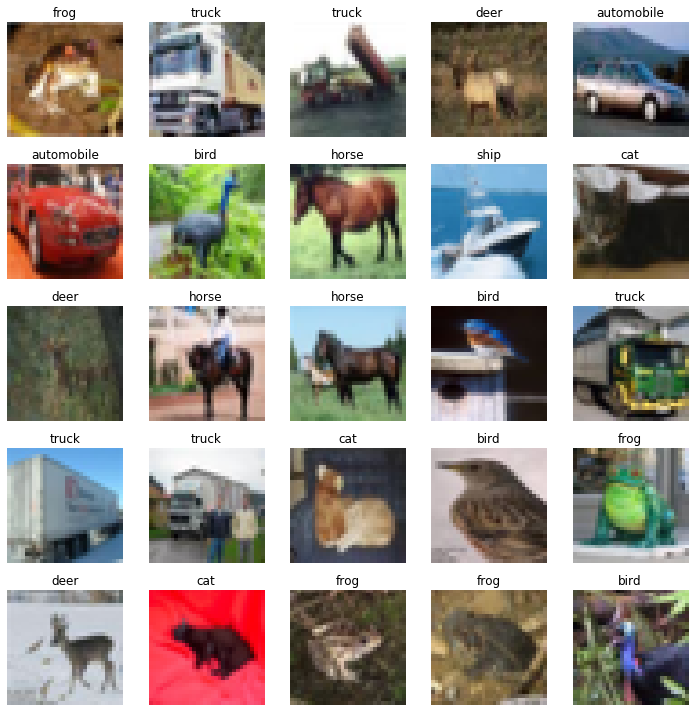

In [44]:
class_names = [
   'airplane', 
   'automobile', 
   'bird', 
   'cat', 
   'deer',
   'dog', 
   'frog', 
   'horse', 
   'ship', 
   'truck'
]

rcParams.update({
   "figure.autolayout": True
})

plt.figure(figsize = (10, 10))
for i in range(25):
   plt.subplot(5, 5, i+1)
   plt.axis("off")
   plt.imshow(train_images[i], cmap=plt.cm.binary)
   # CIFAR labels happen to be array type, indexing is needed
   plt.title(class_names[train_labels[i][0]])
plt.show()

## Convolutional base

As input, CNN takes tensors of shape (height, width, color) ignoring the batch size. This model will be configured to recieve input of (32, 32, 3) which is the format of the CIFAR images.

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

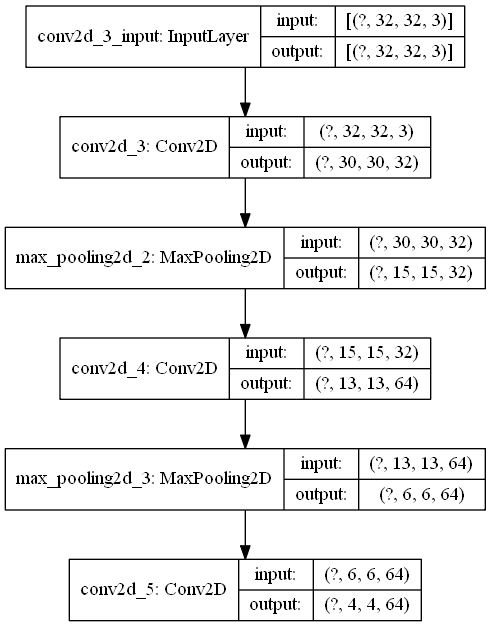

In [47]:
from tensorflow.keras.utils import plot_model
import os

# add Grpahwiz to path variable
os.environ["PATH"] += os.pathsep + "D:/Program Files (x86)/Graphviz2.38/bin/"

plot_model(
    model,
    show_shapes = True,
    expand_nested = True
)

Output of every ```Conv2D``` and ```MaxPooling2D``` is a 3D tensor of shape. Width and height of the image tend to shrink when going deeper into the network. As the width and height shring, we can computationally afford to add mroe output channels in each ```Conv2D``` layer.

## Dense layer

To complete the model, the output of the tensor from the convolutional base shape(4, 4, 4, 64) into one or more ```Dense``` layers to eprform classification. Dense layers take vectors as input (1D), while the current output is a 3D tensor. ```Flatten``` will be used to unroll the 3D tensor into 1D array before it can be fed into a full connected layer. Since there's 10 classes available for the dataset, the out put of the final layer will be 10.

In [48]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

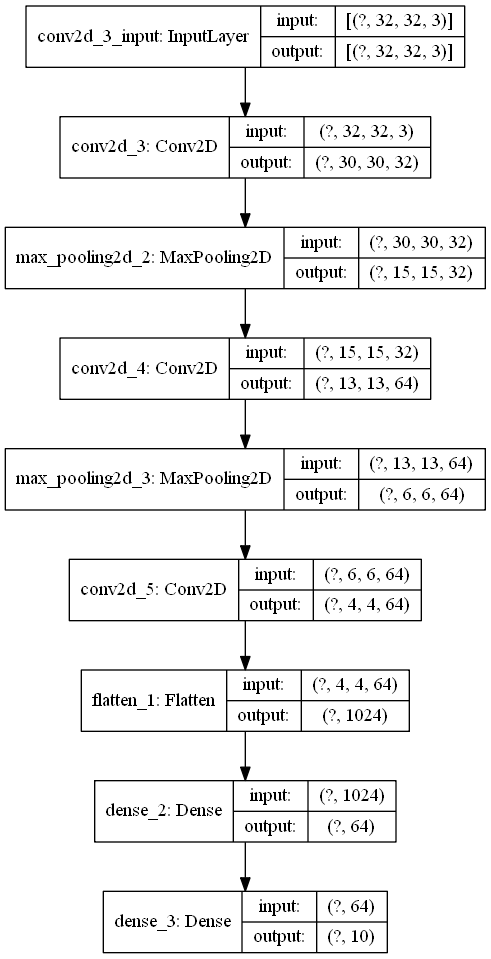

In [49]:
plot_model(
    model,
    show_shapes = True,
    expand_nested = True
)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 42s 830us/sample - loss: 1.5118 - accuracy: 0.4512 - val_loss: 1.2172 - val_accuracy: 0.5673
Epoch 2/10
50000/50000 [==============================] - 39s 782us/sample - loss: 1.1335 - accuracy: 0.6009 - val_loss: 1.0300 - val_accuracy: 0.6379
Epoch 3/10
50000/50000 [==============================] - 37s 738us/sample - loss: 0.9791 - accuracy: 0.6544 - val_loss: 0.9995 - val_accuracy: 0.6496
Epoch 4/10
50000/50000 [==============================] - 38s 752us/sample - loss: 0.8834 - accuracy: 0.6905 - val_loss: 0.9563 - val_accuracy: 0.6671
Epoch 5/10
50000/50000 [==============================] - 38s 766us/sample - loss: 0.8160 - accuracy: 0.7131 - val_loss: 0.9654 - val_accuracy: 0.6687
Epoch 6/10
50000/50000 [==============================] - 37s 735us/sample - loss: 0.7583 - accuracy: 0.7362 - val_loss: 0.9092 - val_accuracy: 0.6857
Epoch 7/10
50000/50000 [====================

In [ ]:
plt.figu
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)